In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = pd.read_csv('satellite_sensor_bands.csv')

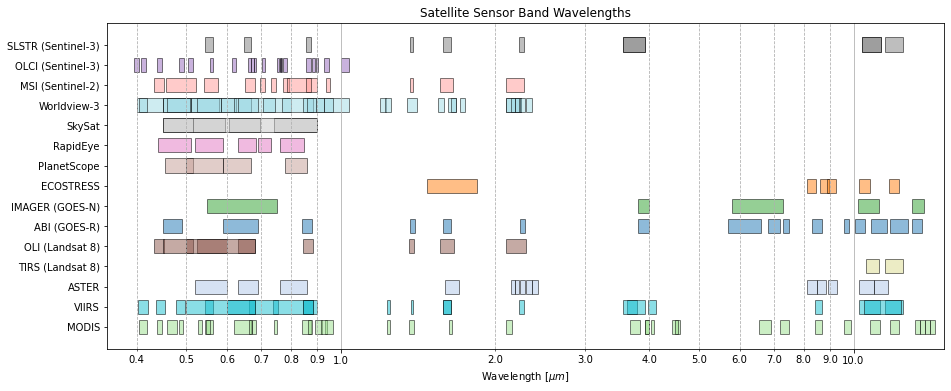

In [3]:
fig, ax = plt.subplots(figsize=(15,6))

# Set up colors
categories = np.unique(df.Sensor)
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors)) 
df['color'] = df.Sensor.apply(lambda x: colordict[x])
cmap = cm.get_cmap('tab20')

# Plot
ax.barh(df.Sensor, df.BandwidthHigh - df.BandwidthLow, height=0.7, left=df.BandwidthLow, 
        color=cmap(df.color), linewidth=1, edgecolor='k', alpha=0.5)
ax.grid(visible=True, which='major', axis='x', linestyle='-')
ax.grid(visible=True, which='minor', axis='x', linestyle='--')
ax.set_xlim((0.35,15))
ax.set_xscale('log')

ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.set_xlabel('Wavelength [$\mu m$]')
ax.set_title('Satellite Sensor Band Wavelengths');

plt.savefig('satellite_sensor_bands.jpg')
plt.savefig('satellite_sensor_bands.svg')